In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [59]:

df = pd.read_csv('./Data/simple_linear_regression_data.csv')
X = df.iloc[:, 1].values.reshape(-1, 1)
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<code>1 Ridge Regression</code>
<pre>It is used to prevent overfeting by adding a penalty term to the loss function</pre>
<code>2D</code>

In [60]:
import numpy as np

class Ridge():
    def __init__(self, alpha):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train)

        x_mean = X_train.mean()
        y_mean = y_train.mean()

        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num += (X_train[i] - x_mean) * (y_train[i] - y_mean)
            den += (X_train[i] - x_mean) ** 2

        self.m = num / (den + self.alpha)  # Ridge penalty
        self.b = y_mean - self.m * x_mean

        print("Slope (m):", self.m)
        print("Intercept (b):", self.b)

    def predict(self, X_test):
        X_test = np.array(X_test)
        return self.m * X_test + self.b


In [61]:
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)


Slope (m): [2.07351688]
Intercept (b): [-10.57417777]


0.9757197644080446

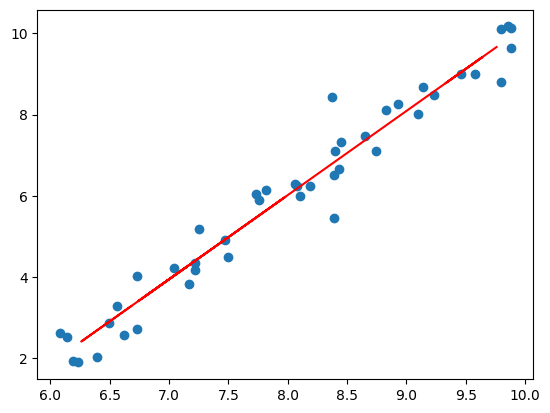

In [62]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred,c="red")

<code>ND</code>

In [76]:
df = pd.read_csv("./Data/multiple_linear_regression_data.csv")
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=2,random_state=42)

In [77]:
class Ridge():
  def __init__(self,alpha):
    self.alpha = alpha
    self.coef_=None
    self.intercept_=None
  def fit(self,X_train,y_train):
    X_train=np.insert(X_train,0,1,axis=1)
    I = np.identity(X_train.shape[1])
    bitas = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
    self.intercept_ = bitas[0]
    self.coef_ = bitas[1:]
  def predict(self,X_test):
    y_pred = np.dot(X_test,self.coef_) + self.intercept_
    return y_pred
  
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.8644448929894702

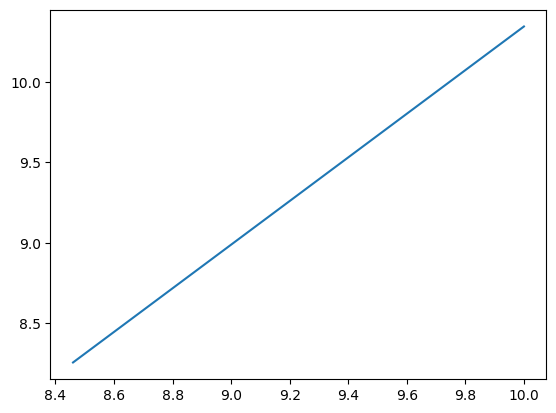

In [ ]:
plt.plot(y_test,y_pred)
